In [1]:
%matplotlib inline

import math
import warnings
import numpy as np

# specify to ignore warning messages
warnings.filterwarnings("ignore") 

import keras
from lstm_utils import get_raw_data
from lstm_utils import get_reg_model
from lstm_utils import plot_reg_results
from lstm_utils import get_reg_train_test
from lstm_utils import predict_reg_multiple

from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('talk')

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

In [3]:
WINDOW = 6
PRED_LENGTH = int(WINDOW/2)
STOCK_INDEX = '^GSPC'

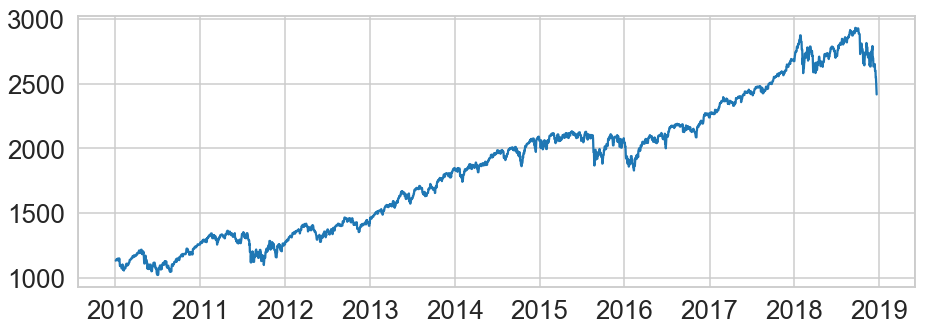

In [4]:
sp_df = get_raw_data(STOCK_INDEX)
sp_close_series = sp_df.Close 

sp_close_series.plot()

In [5]:
x_train,y_train,x_test,y_test,scaler = get_reg_train_test(sp_close_series,
                                                      sequence_length=WINDOW+1,
                                                      roll_mean_window=None,
                                                      normalize=True,
                                                      scale=False)
    
print("Data Split Complete")

print("x_train shape={}".format(x_train.shape))
print("y_train shape={}".format(y_train.shape))
print("x_test shape={}".format(x_test.shape))
print("y_test shape={}".format(y_test.shape))

Data Split Complete
x_train shape=(2940, 6, 1)
y_train shape=(2940,)
x_test shape=(327, 6, 1)
y_test shape=(327,)


In [6]:
x_train,y_train,x_test,y_test,scaler = get_reg_train_test(sp_close_series,sequence_length = WINDOW +1,
                                                         roll_mean_window = None, normalize = True, scale = False)

In [7]:
print("Data Split Complete")
print('Shape of x-train data: {}'. format(x_train.shape))
print('Shape of y-train data: {}'. format(y_train.shape))
print('Shape of x-test data: {}'. format(x_test.shape))
print('Shape of y-test data: {}'. format(y_test.shape))

Data Split Complete
Shape of x-train data: (2940, 6, 1)
Shape of y-train data: (2940,)
Shape of x-test data: (327, 6, 1)
Shape of y-test data: (327,)


In [8]:
lstm_model=None
try:
    lstm_model = get_reg_model(layer_units=[50,100],
                           window_size=WINDOW)   
except:
    print("Model Build Failed. Trying Again")
    lstm_model = get_reg_model(layer_units=[50,100],
                           window_size=WINDOW)

Model Build Failed. Trying Again


TypeError: Expected int32, got list containing Tensors of type '_Message' instead.

In [ ]:
# use eatrly stopping to avoid overfitting     
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss',
                                           patience=2,
                                           verbose=0)]
lstm_model.fit(x_train, y_train, 
               epochs=20, batch_size=16,
               verbose=1,validation_split=0.05,
               callbacks=callbacks)
print("Model Fit Complete")

In [ ]:
train_pred_seqs = predict_reg_multiple(lstm_model,
                                             x_train,
                                             window_size=WINDOW,
                                             prediction_len=PRED_LENGTH)

train_offset = y_train.shape[0] - np.array(train_pred_seqs).flatten().shape[0]

train_rmse = math.sqrt(mean_squared_error(y_train[train_offset:], 
                                          np.array(train_pred_seqs).\
                                          flatten()))
print('Train Score: %.2f RMSE' % (train_rmse))

In [ ]:
test_pred_seqs = predict_reg_multiple(lstm_model,
                                      x_test,
                                      window_size=WINDOW,
                                      prediction_len=PRED_LENGTH)
test_offset = y_test.shape[0] - np.array(test_pred_seqs).flatten().shape[0]

test_rmse = math.sqrt(mean_squared_error(y_test[test_offset:], 
                                          np.array(test_pred_seqs).\
                                          flatten()))
print('Test Score: %.2f RMSE' % (test_rmse))

In [ ]:
plot_reg_results(test_pred_seqs,y_test,prediction_len=PRED_LENGTH)